# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [ ]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [ ]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [ ]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Data Size
df.shape

(48842, 15)

In [ ]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [ ]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

In [65]:
print("Informasi Dataset:")
print(df.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
 15  sex_encoded     48842 non-null  int64 
 16  income_encoded  48842 non-null  int64 
dtypes: int64(8), object(9)
memory u

In [66]:
print("\nMissing Values per Kolom:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Missing Values per Kolom:
Series([], dtype: int64)


## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [ ]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

In [67]:
cols_with_missing = df.columns[df.isnull().any()].tolist()

# Kategorikal = modus
# Numerik = median
for col in cols_with_missing:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

print("Missing values setelah imputation:")
print(df.isnull().sum().sum())

Missing values setelah imputation:
0


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [ ]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

In [68]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if '?' in df[col].values:
        df[col] = df[col].replace('?', 'Others')

    if col == 'income':
        df[col] = df[col].replace('>50K.', '>50K')
        df[col] = df[col].replace('<=50K.', '<=50K')

for col in categorical_cols:
    print(f"\nNilai {col} setelah cleaning: {df[col].unique()}")


Nilai workclass setelah cleaning: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Others' 'Self-emp-inc' 'Without-pay' 'Never-worked']

Nilai education setelah cleaning: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Nilai marital-status setelah cleaning: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Nilai occupation setelah cleaning: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Others'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

Nilai relationship setelah cleaning: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

Nilai race setelah cleaning: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Es

# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

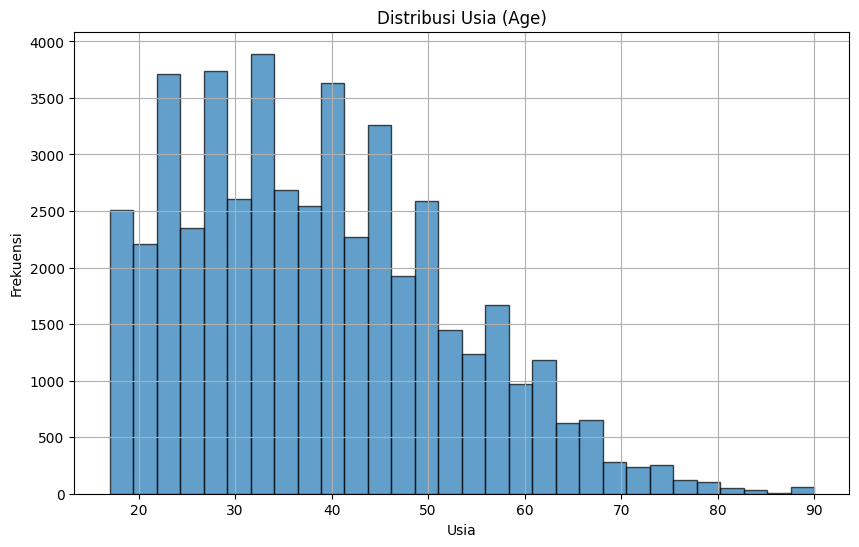

In [ ]:
# Jawab 1.1 - Histrogram
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribusi Usia (Age)')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

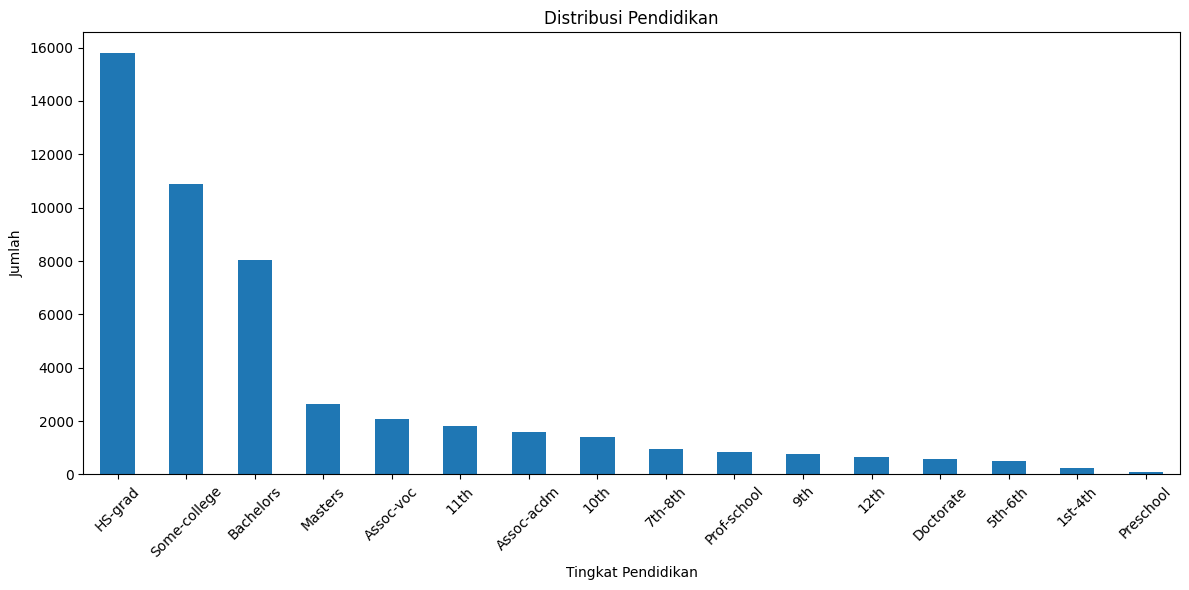

In [ ]:
# Jawab 1.2 - Barchart
plt.figure(figsize=(12, 6))
education_counts = df['education'].value_counts()
education_counts.plot(kind='bar')
plt.title('Distribusi Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

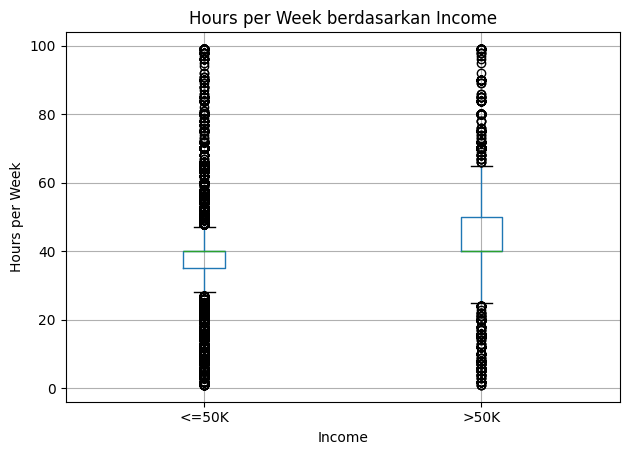

In [ ]:
# Jawab 1.3 - Boxplot
plt.figure(figsize=(10, 6))
df.boxplot(column='hours-per-week', by='income')
plt.title('Hours per Week berdasarkan Income')
plt.suptitle('')  # Hapus judul default
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.tight_layout()
plt.show()

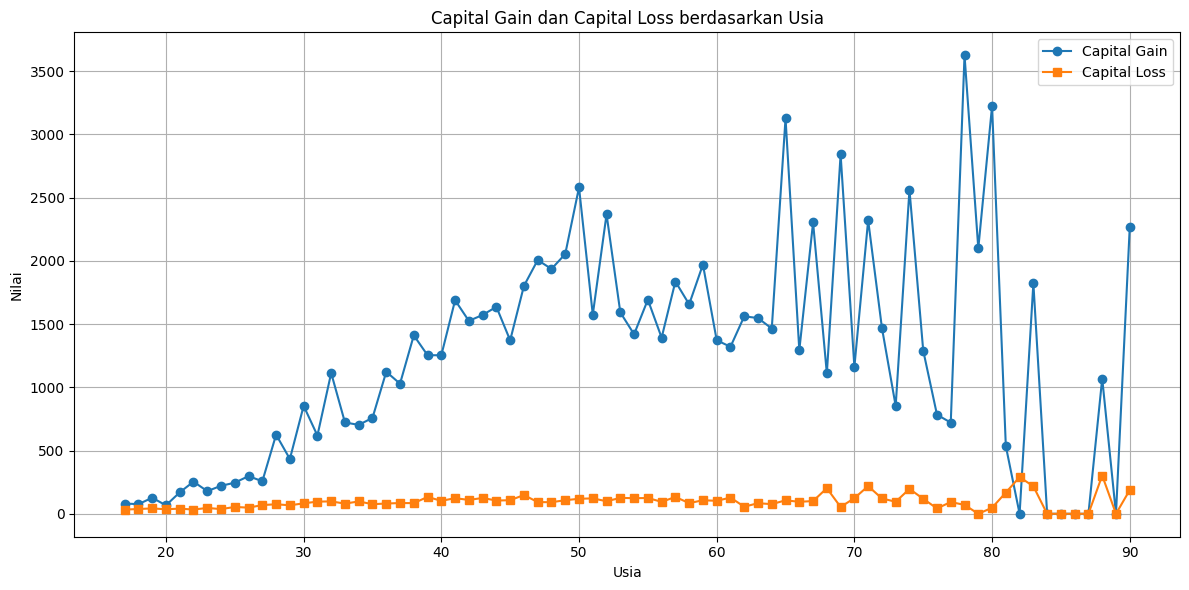

In [ ]:
# Jawab 1.4 - Lineplot
plt.figure(figsize=(12, 6))
age_groups = df.groupby('age')[['capital-gain', 'capital-loss']].mean()
plt.plot(age_groups.index, age_groups['capital-gain'], label='Capital Gain', marker='o')
plt.plot(age_groups.index, age_groups['capital-loss'], label='Capital Loss', marker='s')
plt.title('Capital Gain dan Capital Loss berdasarkan Usia')
plt.xlabel('Usia')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [ ]:
# Jawab dengan komentar python
'''
1. Fenomena apa yang terjadi pada distribusi data 'age'?
Distribusi usia menunjukkan pola normal dengan sedikit right-skewed. Mayoritas populasi berada dalam rentang usia 20-50 tahun, dengan puncak sekitar usia 30-40 tahun.

2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
Jika ada missing values di age menggunakan median karena:
- Median lebih robust terhadap outliers dibanding mean
- Distribusi age sedikit right-skewed, jadi median lebih representatif
- Age adalah variabel numerik diskrit

3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'?
Kategori apa yang paling banyak memiliki outlier?
Untuk menghitung outlier, kita bisa menggunakan IQR method:
'''

In [63]:
# Hitung outlier untuk hours-per-week berdasarkan income
Q1 = df.groupby('income')['hours-per-week'].quantile(0.25)
Q3 = df.groupby('income')['hours-per-week'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = {}
for income_group in df['income'].unique():
    group_data = df[df['income'] == income_group]['hours-per-week']
    outliers[income_group] = len(group_data[(group_data < lower_bound[income_group]) |
                                          (group_data > upper_bound[income_group])])

print("Jumlah outlier per kategori income:")
for income_group, count in outliers.items():
    print(f"{income_group}: {count} outlier")

Jumlah outlier per kategori income:
<=50K: 11706 outlier
>50K: 781 outlier


In [ ]:
'''
Berdasarkan perhitungan IQR, kategori income yang memiliki lebih banyak outlier adalah <=50K.
'''

# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [ ]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

In [73]:
# (0 = Female, 1 = Male)
df['sex_encoded'] = df['sex'].map({'Female': 0, 'Male': 1})

# (0 = <=50K, 1 = >50K)
df['income_encoded'] = df['income'].map({'<=50K': 0, '>50K': 1})

print("Encoding Sex:")
print(df[['sex', 'sex_encoded']].head())
print("\nEncoding Income:")
print(df[['income', 'income_encoded']].head())

display(df.head())

Encoding Sex:
      sex  sex_encoded
0    Male            1
1    Male            1
2    Male            1
3    Male            1
4  Female            0

Encoding Income:
  income  income_encoded
0  <=50K               0
1  <=50K               0
2  <=50K               0
3  <=50K               0
4  <=50K               0


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,sex_encoded,income_encoded
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

In [ ]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

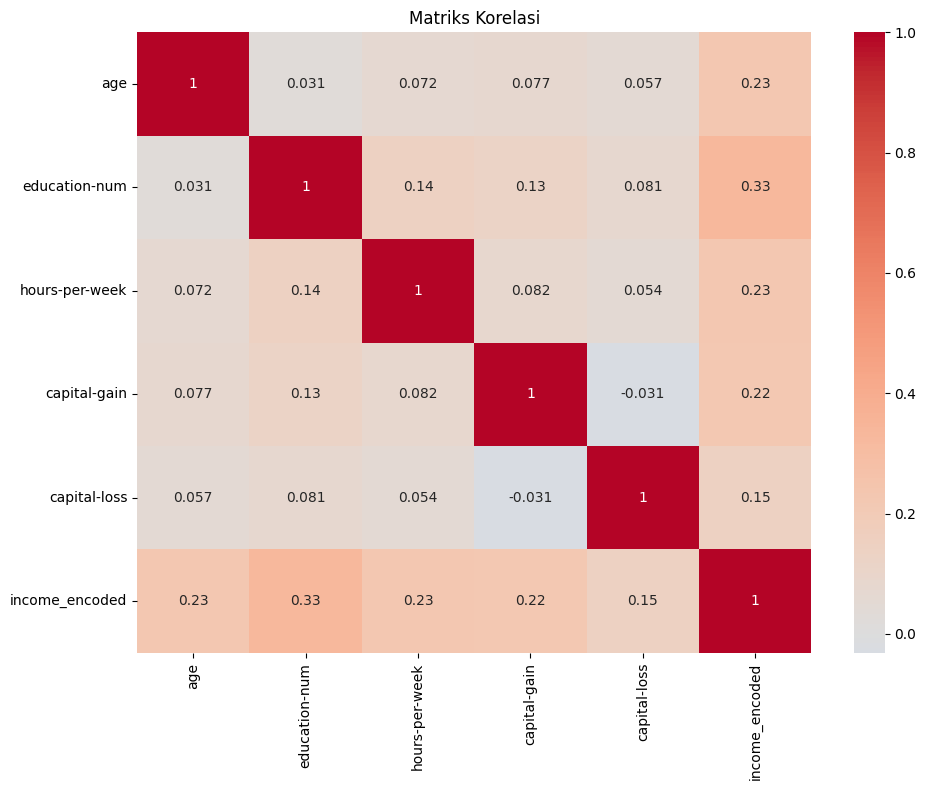

Korelasi dengan Income:
income_encoded    1.000000
education-num     0.332613
age               0.230369
hours-per-week    0.227687
capital-gain      0.223013
capital-loss      0.147554
Name: income_encoded, dtype: float64


In [74]:
correlation_vars = ['age', 'education-num', 'hours-per-week',
                   'capital-gain', 'capital-loss', 'income_encoded']

correlation_matrix = df[correlation_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriks Korelasi')
plt.tight_layout()
plt.show()

income_corr = correlation_matrix['income_encoded'].sort_values(ascending=False)
print("Korelasi dengan Income:")
print(income_corr)

In [ ]:
# Hasil analisis jelaskan pada cell ini
'''
Berdasarkan hasil analisis korelasi:

1. Variabel yang paling berkorelasi positif dengan income adalah:
   - education-num: Semakin tinggi pendidikan, semakin tinggi income
   - age: Semakin tua usia, semakin tinggi income (pengalaman)
   - hours-per-week: Semakin banyak jam kerja, semakin tinggi income

2. Variabel capital-gain dan capital-loss menunjukkan korelasi yang lemah dengan income, menunjukan bahwa hanya sebagian kecil populasi yang memiliki capital gain/loss yang signifikan.

3. Korelasi antar variabel independen cukup rendah, menunjukkan tidak ada multikolinearitas yang serius.

4. Education-num memiliki korelasi tertinggi dengan income, menunjukkan bahwa pendidikan merupakan faktor penting dalam menentukan income.
'''

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [ ]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


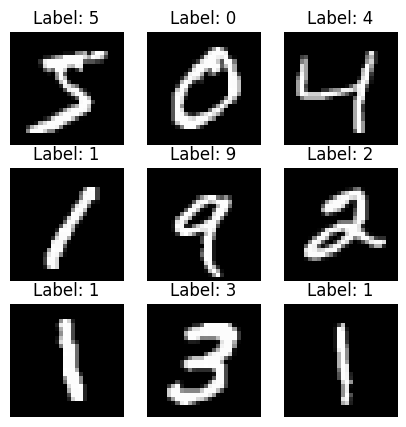

In [ ]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

In [ ]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

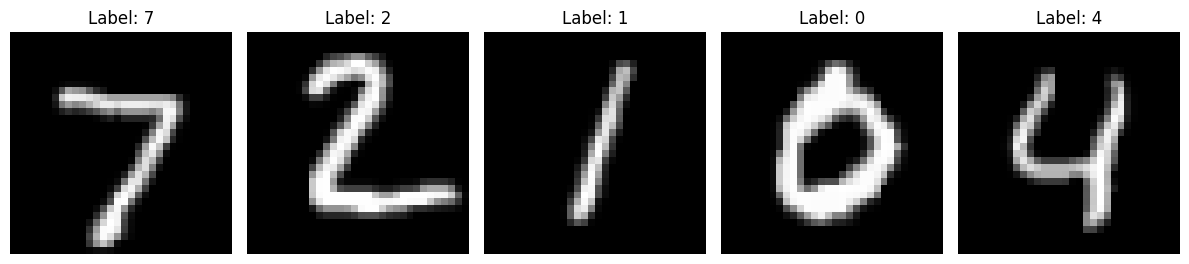

In [77]:
from skimage.transform import resize
import numpy as np

X_test_upsampled = np.zeros((X_test.shape[0], 32, 32))

for i in range(X_test.shape[0]):
    X_test_upsampled[i] = resize(X_test[i], (32, 32), preserve_range=True)

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test_upsampled[i], cmap='gray')
    plt.title(f'Label: {y_test[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

In [ ]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

In [76]:
# Normalisasi ke rentang 0-1
X_test_normalized = X_test_upsampled / 255.0

print("Nilai sebelum normalisasi:", X_test_upsampled.min(), X_test_upsampled.max())
print("Nilai setelah normalisasi:", X_test_normalized.min(), X_test_normalized.max())

Nilai sebelum normalisasi: 0.0 255.0
Nilai setelah normalisasi: 0.0 1.0


## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [ ]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

In [78]:
X_test_flattened = np.zeros((X_test_normalized.shape[0], 32 * 32))

for i in range(X_test_normalized.shape[0]):
    X_test_flattened[i] = X_test_normalized[i].flatten()

print("Shape sebelum flatten:", X_test_normalized.shape)
print("Shape setelah flatten:", X_test_flattened.shape)

print("\nContoh data flattened:")
# 10 Nilai Pertama
print(X_test_flattened[0][:10])

Shape sebelum flatten: (10000, 32, 32)
Shape setelah flatten: (10000, 1024)

Contoh data flattened:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
